# 3. Úvod do lineární algebry

C:\Users\kutsc\AppData\Local\Temp\ipykernel_21084\2008972943.py:29: RuntimeWarning: overflow encountered in scalar multiply
  x_new[i] = (1/matrix[i, i]) * (np.dot(matrix[i, :], x_new) - matrix[i, i]*x_new[i] + matrix[i, i]*np.random.rand())
C:\Users\kutsc\AppData\Local\Temp\ipykernel_21084\2008972943.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  x_new[i] = (1/matrix[i, i]) * (np.dot(matrix[i, :], x_new) - matrix[i, i]*x_new[i] + matrix[i, i]*np.random.rand())


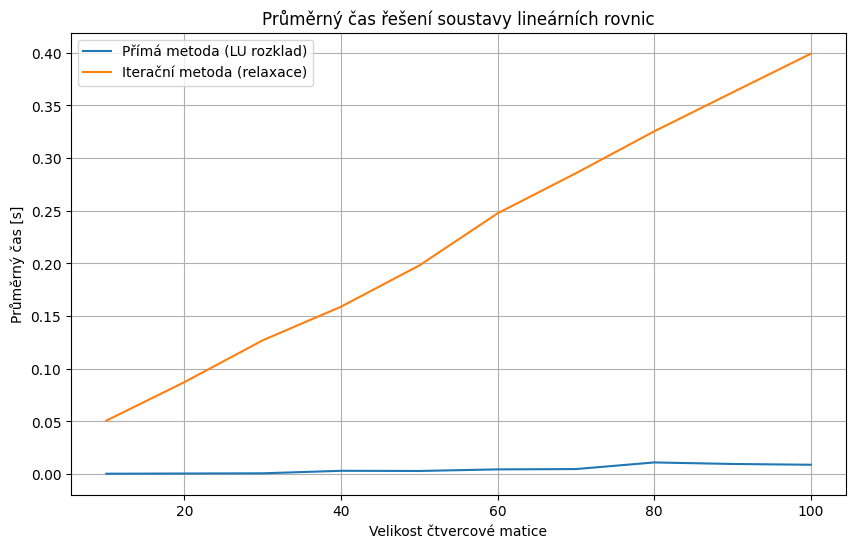

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Generování náhodné čtvercové matice
def generate_random_matrix(size):
    return np.random.rand(size, size)

# Měření času potřebného k nalezení řešení soustavy lineárních rovnic
def measure_time(method, matrix):
    start_time = time.time()
    method(matrix)
    end_time = time.time()
    return end_time - start_time

# Přímé řešení soustavy lineárních rovnic pomocí LU rozkladu
def direct_method(matrix):
    np.linalg.solve(matrix, np.random.rand(matrix.shape[0]))

# Iterační řešení soustavy lineárních rovnic pomocí metody relaxace
def iterative_method(matrix):
    size = matrix.shape[0]
    x = np.zeros(size)
    max_iter = 1000
    tolerance = 1e-6
    for _ in range(max_iter):
        x_new = np.copy(x)
        for i in range(size):
            x_new[i] = (1/matrix[i, i]) * (np.dot(matrix[i, :], x_new) - matrix[i, i]*x_new[i] + matrix[i, i]*np.random.rand())
        if np.linalg.norm(x_new - x) < tolerance:
            break
        x = x_new

# Rozsah velikosti matice
sizes = np.arange(10, 101, 10)


num_trials = 10

# Měření průměrného času
average_times_direct = []
average_times_iterative = []

for size in sizes:
    total_time_direct = 0
    total_time_iterative = 0
    for _ in range(num_trials):
        matrix = generate_random_matrix(size)
        total_time_direct += measure_time(direct_method, matrix)
        total_time_iterative += measure_time(iterative_method, matrix)
    average_time_direct = total_time_direct / num_trials
    average_time_iterative = total_time_iterative / num_trials
    average_times_direct.append(average_time_direct)
    average_times_iterative.append(average_time_iterative)

# Vizualizace
plt.figure(figsize=(10, 6))
plt.plot(sizes, average_times_direct, label='Přímá metoda (LU rozklad)')
plt.plot(sizes, average_times_iterative, label='Iterační metoda (relaxace)')
plt.xlabel('Velikost čtvercové matice')
plt.ylabel('Průměrný čas [s]')
plt.title('Průměrný čas řešení soustavy lineárních rovnic')
plt.legend()
plt.grid(True)
plt.show()